In [1]:
import time
import numpy as np
from sklearn import metrics
import pycaret
from pycaret.datasets import get_data
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment

from sktime.utils.plotting import plot_series

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

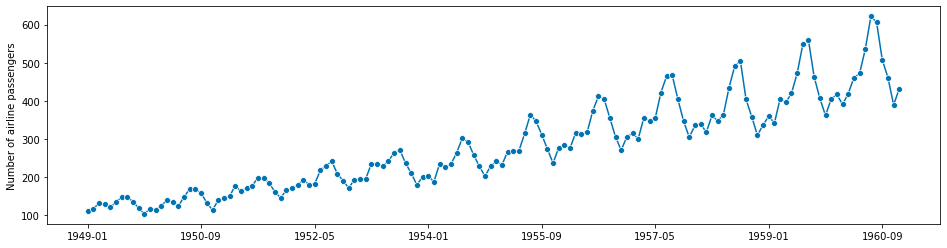

In [2]:
y = get_data('airline', verbose=False)
plot_series(y)

In [3]:
fh = np.arange(1,13)
fold = 3

In [4]:
# Available Models
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=12)
exp.models()

,Description,Value
0,session_id,8517
1,Original Data,"(144, 1)"
2,Missing Values,False
3,Transformed Train Set,"(132,)"
4,Transformed Test Set,"(12,)"
5,Fold Generator,TimeSeriesSplit
6,Fold Number,10
7,CPU Jobs,-1
8,Use GPU,False
9,Log Experiment,False


,Name,Reference,Turbo
ID,,,
naive,Naive,sktime.forecasting.naive.NaiveForecaster,True
poly_trend,PolyTrend,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
exp_smooth,ExponentialSmoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
auto_ets,AutoETS,sktime.forecasting.ets.AutoETS,True
theta,Theta,sktime.forecasting.theta.ThetaForecaster,True
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsDt,True
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsDt,True
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsDt,True


## Sliding Window Splitter

In [5]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='slidingwindow')
model = exp.create_model("arima")

,smape,mape,mae,rmse
0,0.2544,0.2172,86.4672,10986.2059
1,0.1969,0.1705,72.3623,9262.3183
2,0.2978,0.2508,115.1556,18344.7882
Mean,0.2497,0.2128,91.3284,12864.4375
SD,0.0413,0.0329,17.8053,3938.5810


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

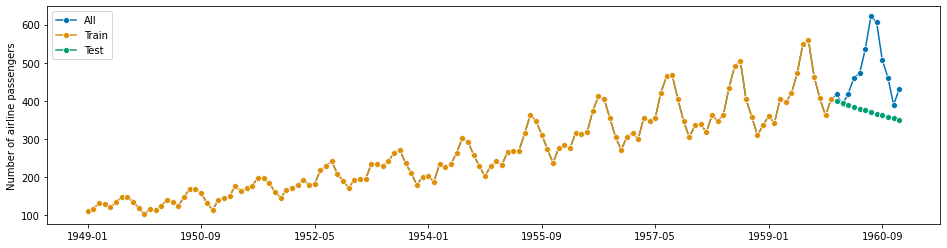

In [6]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

## Expanding Window Splitter

In [7]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='expandingwindow')
model = exp.create_model("arima")

,smape,mape,mae,rmse
0,0.2544,0.2172,86.4672,10986.2059
1,0.1931,0.1675,71.1742,9049.5816
2,0.2962,0.2496,114.6292,18211.8564
Mean,0.2479,0.2114,90.7569,12749.2146
SD,0.0424,0.0338,17.9979,3942.7545


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

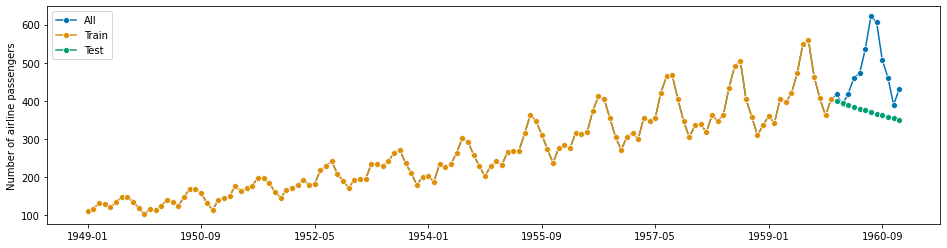

In [8]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

# Model types

## Common Setup

In [4]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='expandingwindow', session_id=42)

,Description,Value
0,session_id,42
1,Original Data,"(144, 1)"
2,Missing Values,False
3,Transformed Train Set,"(132,)"
4,Transformed Test Set,"(12,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,CPU Jobs,-1
8,Use GPU,False
9,Log Experiment,False


## Naive

,smape,mape,mae,rmse
0,0.1138,0.1076,40.1667,1720.1667
1,0.0322,0.0314,12.5833,289.4167
2,0.1176,0.1106,47.3333,2426.0000
Mean,0.0879,0.0832,33.3611,1478.5278
SD,0.0394,0.0367,14.9806,888.8341


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

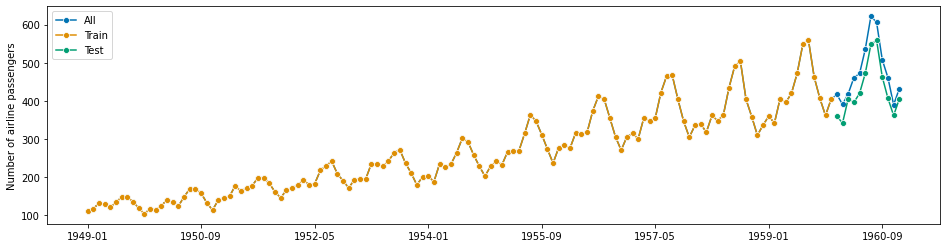

In [10]:
model = exp.create_model("naive")
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

In [11]:
# Fixed Grid Search
tuned_model = exp.tune_model(model)
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.1138,0.1076,40.1667,1720.1667
1,0.0322,0.0314,12.5833,289.4167
2,0.1176,0.1106,47.3333,2426.0000
Mean,0.0879,0.0832,33.3611,1478.5278
SD,0.0394,0.0367,14.9806,888.8341


NaiveForecaster(sp=12, strategy='last', window_length=None)
NaiveForecaster(sp=12, strategy='last', window_length=None)


In [12]:
# Random Grid Search
tuned_model = exp.tune_model(model, search_algorithm="random")
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.1138,0.1076,40.1667,1720.1667
1,0.0322,0.0314,12.5833,289.4167
2,0.1176,0.1106,47.3333,2426.0000
Mean,0.0879,0.0832,33.3611,1478.5278
SD,0.0394,0.0367,14.9806,888.8341


NaiveForecaster(sp=12, strategy='last', window_length=None)
NaiveForecaster(sp=12, strategy='last', window_length=None)


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

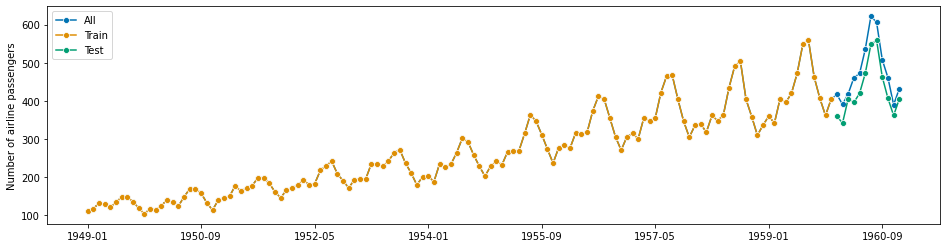

In [13]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = tuned_model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

## Polynomial Trend

,smape,mape,mae,rmse
0,0.1226,0.1140,45.8148,3789.0261
1,0.1278,0.1275,49.9929,3759.3858
2,0.1144,0.1096,50.0825,4545.5664
Mean,0.1216,0.1170,48.6301,4031.3261
SD,0.0055,0.0076,1.9910,363.8241


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

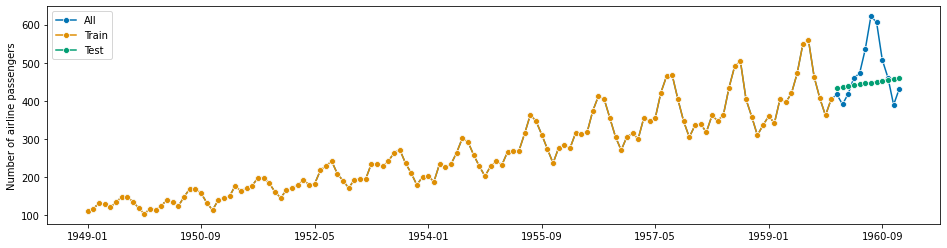

In [14]:
model = exp.create_model("poly_trend")
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

In [15]:
# Fixed Grid Search
tuned_model = exp.tune_model(model)
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.1226,0.1140,45.8148,3789.0261
1,0.1278,0.1275,49.9929,3759.3858
2,0.1144,0.1096,50.0825,4545.5664
Mean,0.1216,0.1170,48.6301,4031.3261
SD,0.0055,0.0076,1.9910,363.8241


PolynomialTrendForecaster(degree=1, regressor=None, with_intercept=True)
PolynomialTrendForecaster(degree=1, regressor=None, with_intercept=True)


In [16]:
# Random Grid Search
tuned_model = exp.tune_model(model, search_algorithm="random")
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.1215,0.1232,45.6407,3009.1181
1,0.1651,0.1792,65.0246,5126.1853
2,0.1146,0.1110,50.1574,4417.8619
Mean,0.1337,0.1378,53.6076,4184.3884
SD,0.0223,0.0297,8.2810,879.9150


PolynomialTrendForecaster(degree=1, regressor=None, with_intercept=True)
PolynomialTrendForecaster(degree=3, regressor=None, with_intercept=True)


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

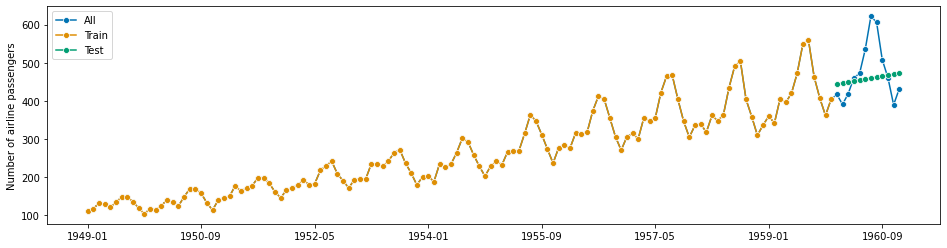

In [17]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = tuned_model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

## ARIMA

,smape,mape,mae,rmse
0,0.2544,0.2172,86.4672,10986.2059
1,0.1931,0.1675,71.1742,9049.5816
2,0.2962,0.2496,114.6292,18211.8564
Mean,0.2479,0.2114,90.7569,12749.2146
SD,0.0424,0.0338,17.9979,3942.7545


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

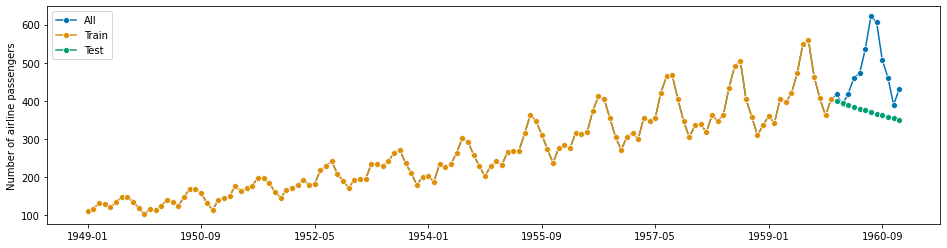

In [18]:
model = exp.create_model("arima")
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

In [19]:
# Fixed Grid Search
tuned_model = exp.tune_model(model)
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.2767,0.2401,91.6004,9823.6666
1,0.1797,0.1623,65.5763,5777.5063
2,0.3155,0.2685,118.6957,16425.1666
Mean,0.2573,0.2237,91.9575,10675.4465
SD,0.0571,0.0449,21.6874,4388.4177


ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 12),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)
ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 1, 12),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)


In [20]:
# Random Grid Search
tuned_model = exp.tune_model(model, search_algorithm="random")
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.0339,0.0331,13.2626,277.8525
1,0.0513,0.0530,19.1686,455.3259
2,0.0506,0.0491,21.1925,551.0621
Mean,0.0453,0.0451,17.8746,428.0802
SD,0.0080,0.0086,3.3642,113.1890


ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 12),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)
ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(1, 1, 0, 12),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

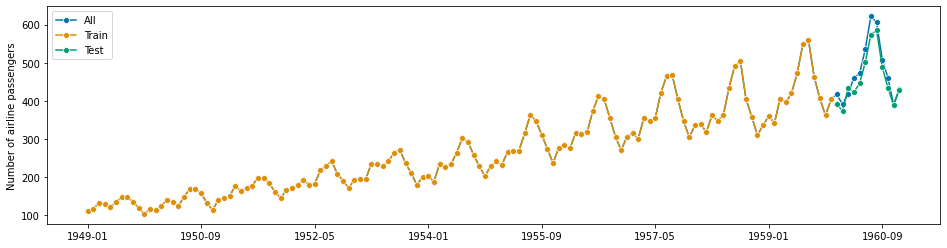

In [21]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = tuned_model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

## Exponential Smoothing

,smape,mape,mae,rmse
0,0.1142,0.1060,42.2964,2701.5726
1,0.0500,0.0505,19.1495,477.6660
2,0.0874,0.0826,35.7844,1681.2638
Mean,0.0838,0.0797,32.4101,1620.1674
SD,0.0263,0.0228,9.7463,908.9334


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

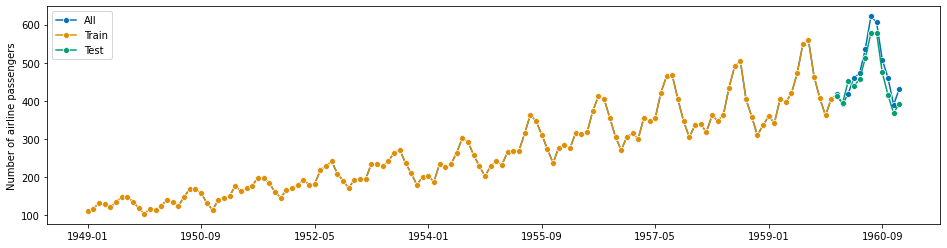

In [22]:
model = exp.create_model("exp_smooth")
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

In [23]:
# Fixed Grid Search
tuned_model = exp.tune_model(model)
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.0273,0.0272,10.5620,182.1899
1,0.0704,0.0738,26.2572,903.9130
2,0.0265,0.0261,11.2644,179.8604
Mean,0.0414,0.0424,16.0279,421.9878
SD,0.0205,0.0222,7.2389,340.7739


ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal='add', sp=12,
                     trend=None, use_boxcox=None)
ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal='add', sp=12,
                     trend='add', use_boxcox=True)


In [24]:
# Random Grid Search
tuned_model = exp.tune_model(model, search_algorithm="random")
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.0273,0.0272,10.5620,182.1899
1,0.0704,0.0738,26.2572,903.9130
2,0.0265,0.0261,11.2644,179.8604
Mean,0.0414,0.0424,16.0279,421.9878
SD,0.0205,0.0222,7.2389,340.7739


ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal='add', sp=12,
                     trend=None, use_boxcox=None)
ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal='additive',
                     sp=None, trend='additive', use_boxcox=True)


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

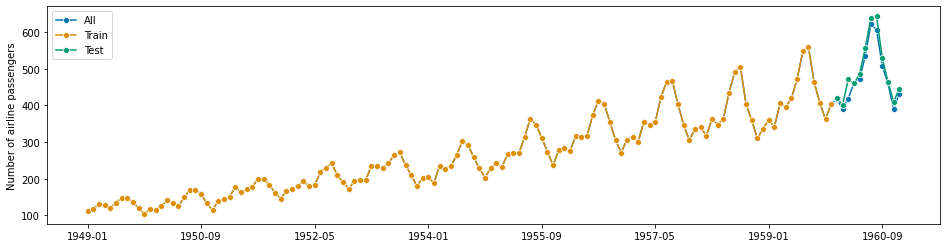

In [25]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = tuned_model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

## Theta Model

,smape,mape,mae,rmse
0,0.0619,0.0594,23.3572,817.7919
1,0.0401,0.0401,16.0904,438.9525
2,0.1080,0.1013,45.5099,2708.5061
Mean,0.0700,0.0670,28.3192,1321.7502
SD,0.0283,0.0255,12.5125,992.7063


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

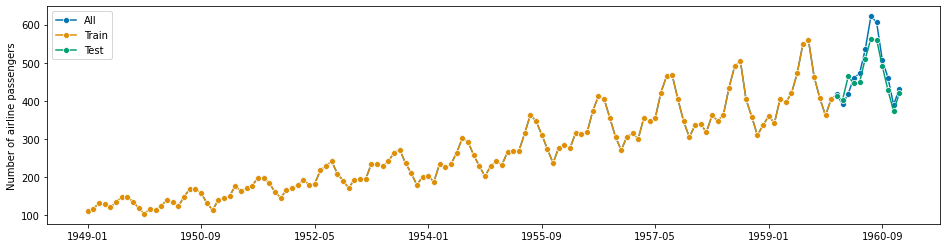

In [26]:
model = exp.create_model("theta")
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

In [27]:
# Fixed Grid Search
tuned_model = exp.tune_model(model)
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.0592,0.0570,22.3655,776.5129
1,0.0378,0.0378,15.0918,398.2215
2,0.0884,0.0832,37.8295,2153.9634
Mean,0.0618,0.0593,25.0956,1109.5659
SD,0.0207,0.0186,9.4813,754.4759


ThetaForecaster(deseasonalize=True, initial_level=None, sp=12)
ThetaForecaster(deseasonalize=True, initial_level=None, sp=24)


In [28]:
# Random Grid Search
tuned_model = exp.tune_model(model, search_algorithm="random")
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.0592,0.0570,22.3655,776.5129
1,0.0378,0.0378,15.0918,398.2215
2,0.0884,0.0832,37.8295,2153.9634
Mean,0.0618,0.0593,25.0956,1109.5659
SD,0.0207,0.0186,9.4813,754.4759


ThetaForecaster(deseasonalize=True, initial_level=None, sp=12)
ThetaForecaster(deseasonalize=True, initial_level=None, sp=24)


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

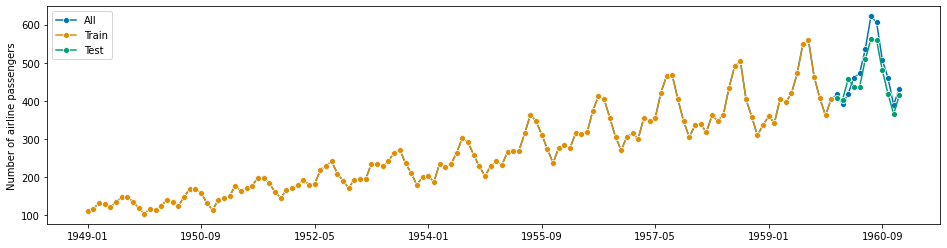

In [29]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = tuned_model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

## AutoETS

,smape,mape,mae,rmse
0,0.1142,0.1060,42.2975,2701.5848
1,0.0486,0.0491,18.6679,473.8035
2,0.0889,0.0839,36.2976,1747.4134
Mean,0.0839,0.0796,32.4210,1640.9339
SD,0.0270,0.0234,10.0286,912.5991


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

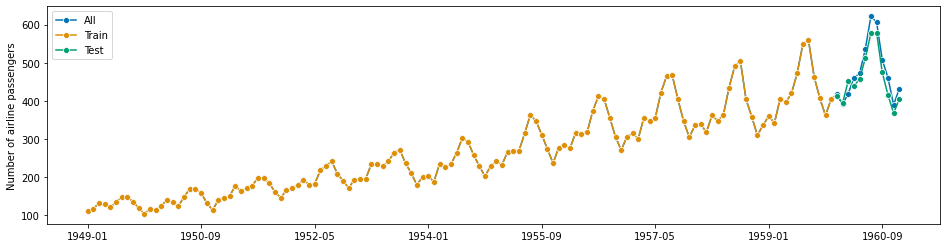

In [6]:
model = exp.create_model("auto_ets")
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

In [7]:
# Fixed Grid Search
tuned_model = exp.tune_model(model)
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.0376,0.0366,14.5582,352.4071
1,0.0447,0.0458,16.8005,373.5136
2,0.0512,0.0495,20.8908,549.0481
Mean,0.0445,0.0440,17.4165,424.9896
SD,0.0055,0.0054,2.6217,88.1448


AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
        bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
        error='add', freq=None, full_output=True, information_criterion='aic',
        initial_level=None, initial_seasonal=None, initial_trend=None,
        initialization_method='estimated', maxiter=1000, missing='none',
        n_jobs=None, restrict=True, return_params=False, seasonal='add', sp=12,
        start_params=None, trend=None)
AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
        bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
        error='add', freq=None, full_output=True, information_criterion='aic',
        initial_level=None, initial_seasonal=None, initial_trend=None,
        initialization_method='estimated', maxiter=1000, missing='none',
        n_jobs=None, restrict=True, return_params=False, seasonal='mul', sp=12,
        start_params=None, trend='add')


In [8]:
# Random Grid Search
tuned_model = exp.tune_model(model, search_algorithm="random")
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.0376,0.0366,14.5582,352.4071
1,0.0447,0.0458,16.8005,373.5136
2,0.0512,0.0495,20.8908,549.0481
Mean,0.0445,0.0440,17.4165,424.9896
SD,0.0055,0.0054,2.6217,88.1448


AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
        bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
        error='add', freq=None, full_output=True, information_criterion='aic',
        initial_level=None, initial_seasonal=None, initial_trend=None,
        initialization_method='estimated', maxiter=1000, missing='none',
        n_jobs=None, restrict=True, return_params=False, seasonal='add', sp=12,
        start_params=None, trend=None)
AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
        bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
        error='add', freq=None, full_output=True, information_criterion='aic',
        initial_level=None, initial_seasonal=None, initial_trend=None,
        initialization_method='estimated', maxiter=1000, missing='none',
        n_jobs=None, restrict=True, return_params=False, seasonal='mul', sp=12,
        start_params=None, trend='add')


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

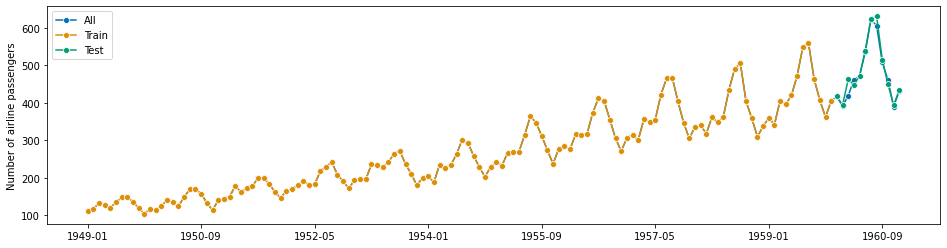

In [9]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = tuned_model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

## Random Forest (with internal conditional deseasonalize and detrending)

,smape,mape,mae,rmse
0,0.0721,0.0678,28.0638,1611.5346
1,0.0748,0.0738,29.7063,1450.1777
2,0.0493,0.0470,22.8056,1290.5687
Mean,0.0654,0.0629,26.8586,1450.7603
SD,0.0115,0.0115,2.9433,131.0344


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

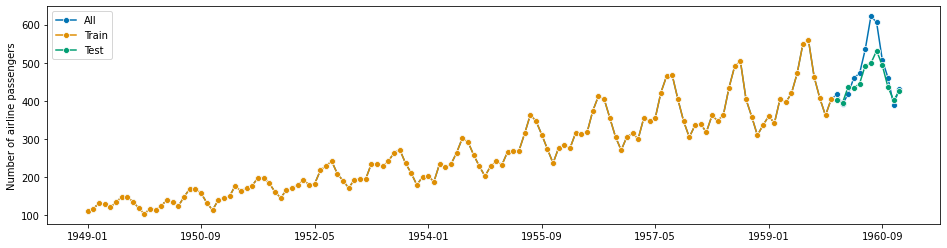

In [10]:
model = exp.create_model("rf_cds_dt")
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

In [11]:
# Fixed Grid Search
tuned_model = exp.tune_model(model)
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.0667,0.0631,26.0565,1308.5808
1,0.0559,0.0563,21.7997,727.3647
2,0.0409,0.0395,18.9182,869.3599
Mean,0.0545,0.0530,22.2582,968.4351
SD,0.0106,0.0099,2.9322,247.4065


BaseCdsDt(degree=1, deseasonal_model='additive',
          regressor=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                          criterion='mse', max_depth=None,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=100, n_jobs=-1,
                                          oob_score=False, random_state=42,
                                          verbose=0, warm_start=False),
          sp=1, window_length=10)
BaseCdsDt(degree=1, deseasonal_model='additive',
          regressor=Rand

In [12]:
# Random Grid Search
tuned_model = exp.tune_model(model, search_algorithm="random")
print(model)
print(tuned_model)

,smape,mape,mae,rmse
0,0.0521,0.0502,20.1918,682.5538
1,0.0482,0.0496,18.5111,509.3313
2,0.0405,0.0396,18.1008,517.7899
Mean,0.0470,0.0465,18.9346,569.8917
SD,0.0048,0.0049,0.9046,79.7390


BaseCdsDt(degree=1, deseasonal_model='additive',
          regressor=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                          criterion='mse', max_depth=None,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=100, n_jobs=-1,
                                          oob_score=False, random_state=42,
                                          verbose=0, warm_start=False),
          sp=1, window_length=10)
BaseCdsDt(degree=1, deseasonal_model='multiplicative',
          regresso

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

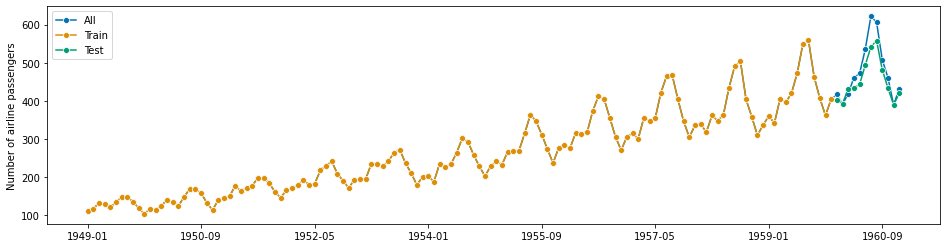

In [13]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = tuned_model.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

## Tune Models

Shown above

## Blend Models

In [14]:
arima_model = exp.create_model("arima")
naive_model = exp.create_model("naive")

,smape,mape,mae,rmse
0,0.1138,0.1076,40.1667,1720.1667
1,0.0322,0.0314,12.5833,289.4167
2,0.1176,0.1106,47.3333,2426.0000
Mean,0.0879,0.0832,33.3611,1478.5278
SD,0.0394,0.0367,14.9806,888.8341


In [15]:
mean_blender = exp.blend_models([arima_model, naive_model], method='mean')

,smape,mape,mae,rmse
0,0.1796,0.1624,63.3169,5202.6704
1,0.1047,0.0969,41.0937,2976.0921
2,0.2008,0.1801,80.9813,8142.2704
Mean,0.1617,0.1465,61.7973,5440.3443
SD,0.0412,0.0358,16.3195,2115.7687


In [16]:
median_blender = exp.blend_models([arima_model, naive_model], method='median')

,smape,mape,mae,rmse
0,0.1796,0.1624,63.3169,5202.6704
1,0.1047,0.0969,41.0937,2976.0921
2,0.2008,0.1801,80.9813,8142.2704
Mean,0.1617,0.1465,61.7973,5440.3443
SD,0.0412,0.0358,16.3195,2115.7687


In [17]:
voting_blender = exp.blend_models([arima_model, naive_model], method='voting', weights=[1.2, 0.7])

,smape,mape,mae,rmse
0,0.1983,0.1768,69.4091,6501.5617
1,0.1255,0.1142,48.5964,4246.0174
2,0.2246,0.1984,89.8360,10370.0948
Mean,0.1828,0.1631,69.2805,7039.2246
SD,0.0419,0.0357,16.8362,2528.8854


## Compare Models

In [5]:
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='expandingwindow')

best_baseline_models = exp.compare_models(fold=fold, sort='smape', n_select=3)
best_baseline_models

,Model,smape,mape,mae,rmse,TT (Sec)
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,0.0529,0.0518,21.7990,861.0526,0.0333
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.0538,0.0526,22.0643,856.8532,0.5933
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.0631,0.0613,24.8102,1079.7144,0.5533
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,0.0641,0.0617,25.8293,1290.4445,0.4900
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.0649,0.0623,26.3755,1348.8173,0.5933
theta,Theta,0.0700,0.0670,28.3192,1321.7502,0.0167
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.0708,0.0682,28.6993,1515.1429,0.1033
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.0722,0.0698,28.7738,1339.5259,0.0400
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.0722,0.0694,29.3617,1477.7939,0.0633
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.0818,0.0799,32.0341,1558.5530,0.0233


[BaseCdsDt(degree=1, deseasonal_model='additive',
           regressor=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                           max_depth=None, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           presort='deprecated',
                                           random_state=3833, splitter='best'),
           sp=1, window_length=10),
 BaseCdsDt(degree=1, deseasonal_model='additive',
           regressor=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                         criterion='mse', max_depth=None,
                 

In [6]:
# TBD (It does not tune multiple models at this time - why? Also should it be tune_model or tune_models?)
best_tuned_models = exp.tune_model(best_baseline_models[0], search_algorithm="random")
best_tuned_models

,smape,mape,mae,rmse
0,0.0538,0.0518,19.4329,552.0622
1,0.0714,0.0748,27.8830,1156.1875
2,0.0477,0.0468,20.2477,623.7640
Mean,0.0576,0.0578,22.5212,777.3379
SD,0.0101,0.0122,3.8059,269.4816


BaseCdsDt(degree=1, deseasonal_model='additive',
          regressor=DecisionTreeRegressor(ccp_alpha=0.0,
                                          criterion='friedman_mse', max_depth=3,
                                          max_features='sqrt',
                                          max_leaf_nodes=None,
                                          min_impurity_decrease=1.1402510239480663e-08,
                                          min_impurity_split=None,
                                          min_samples_leaf=2,
                                          min_samples_split=7,
                                          min_weight_fraction_leaf=0.0,
                                          presort='deprecated',
                                          random_state=3833, splitter='best'),
          sp=24, window_length=17)

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

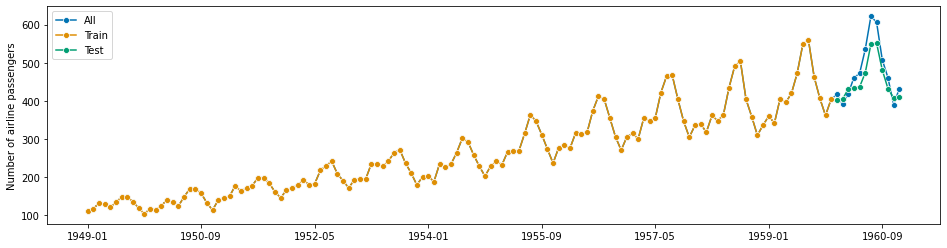

In [7]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = best_tuned_models.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])

In [11]:
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='slidingwindow')

best_models = exp.compare_models(fold=fold, sort='smape', n_select=3)
best_models

,Model,smape,mape,mae,rmse,TT (Sec)
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.0547,0.0538,22.1884,843.2252,0.5967
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,0.0615,0.0594,24.6199,1130.5474,0.4733
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.0621,0.0602,25.1004,1131.6690,0.0600
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.0652,0.0641,26.0520,1202.6687,0.1033
theta,Theta,0.0692,0.0664,27.9583,1250.5362,0.0167
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.0695,0.0673,27.9878,1451.3757,0.5900
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.0696,0.0673,27.6795,1318.9902,0.0533
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.0715,0.0687,28.7711,1406.1923,0.4700
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,0.0722,0.0715,29.9189,1733.2135,0.0333
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.0781,0.0769,30.4357,1470.4230,0.0267


[BaseCdsDt(degree=1, deseasonal_model='additive',
           regressor=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                         criterion='mse', max_depth=None,
                                         max_features='auto',
                                         max_leaf_nodes=None, max_samples=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1, min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=100, n_jobs=-1,
                                         oob_score=False, random_state=8371,
                                         verbose=0, warm_start=False),
           sp=1, window_length=10),
 BaseCdsDt(degree=1, deseasonal_model='additive',
           regressor=KNeighborsRegressor(algorithm='auto', leaf_size=3

## Error Handling

In [12]:
try:
    exp = TimeSeriesExperiment()
    exp.setup(data=y, fh=17, fold=76, fold_strategy='expandingwindow')
except ValueError as error:
    print(error)

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:26:21
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies


Not Enough Data Points, set a lower number of folds or fh
